<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW9_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Сгенерируйте данные с помощью кода:**

**from sklearn.datasets import make_classification**

**x_data_generated, y_data_generated = make_classification(scale=1)**

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1, random_state=8)

In [ ]:
import pandas as pd

In [ ]:
results = pd.DataFrame(columns=['Cпособ выбора признаков', 'Количество признаков', 'Cредняя точность модели'])

# **2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:**

**cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
res1 = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
res1

0.76

In [ ]:
results.loc[len(results.index)] = ['First', len(x_data_generated[0]), res1]

#**3. Используйте статистические методы для отбора признаков:**

**a) Выберите признаки на основе матрицы корреляции.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
names = [chr(i) for i in range(97, 117)]

In [ ]:
df = pd.DataFrame(x_data_generated, columns = names)

In [ ]:
df['target'] = y_data_generated

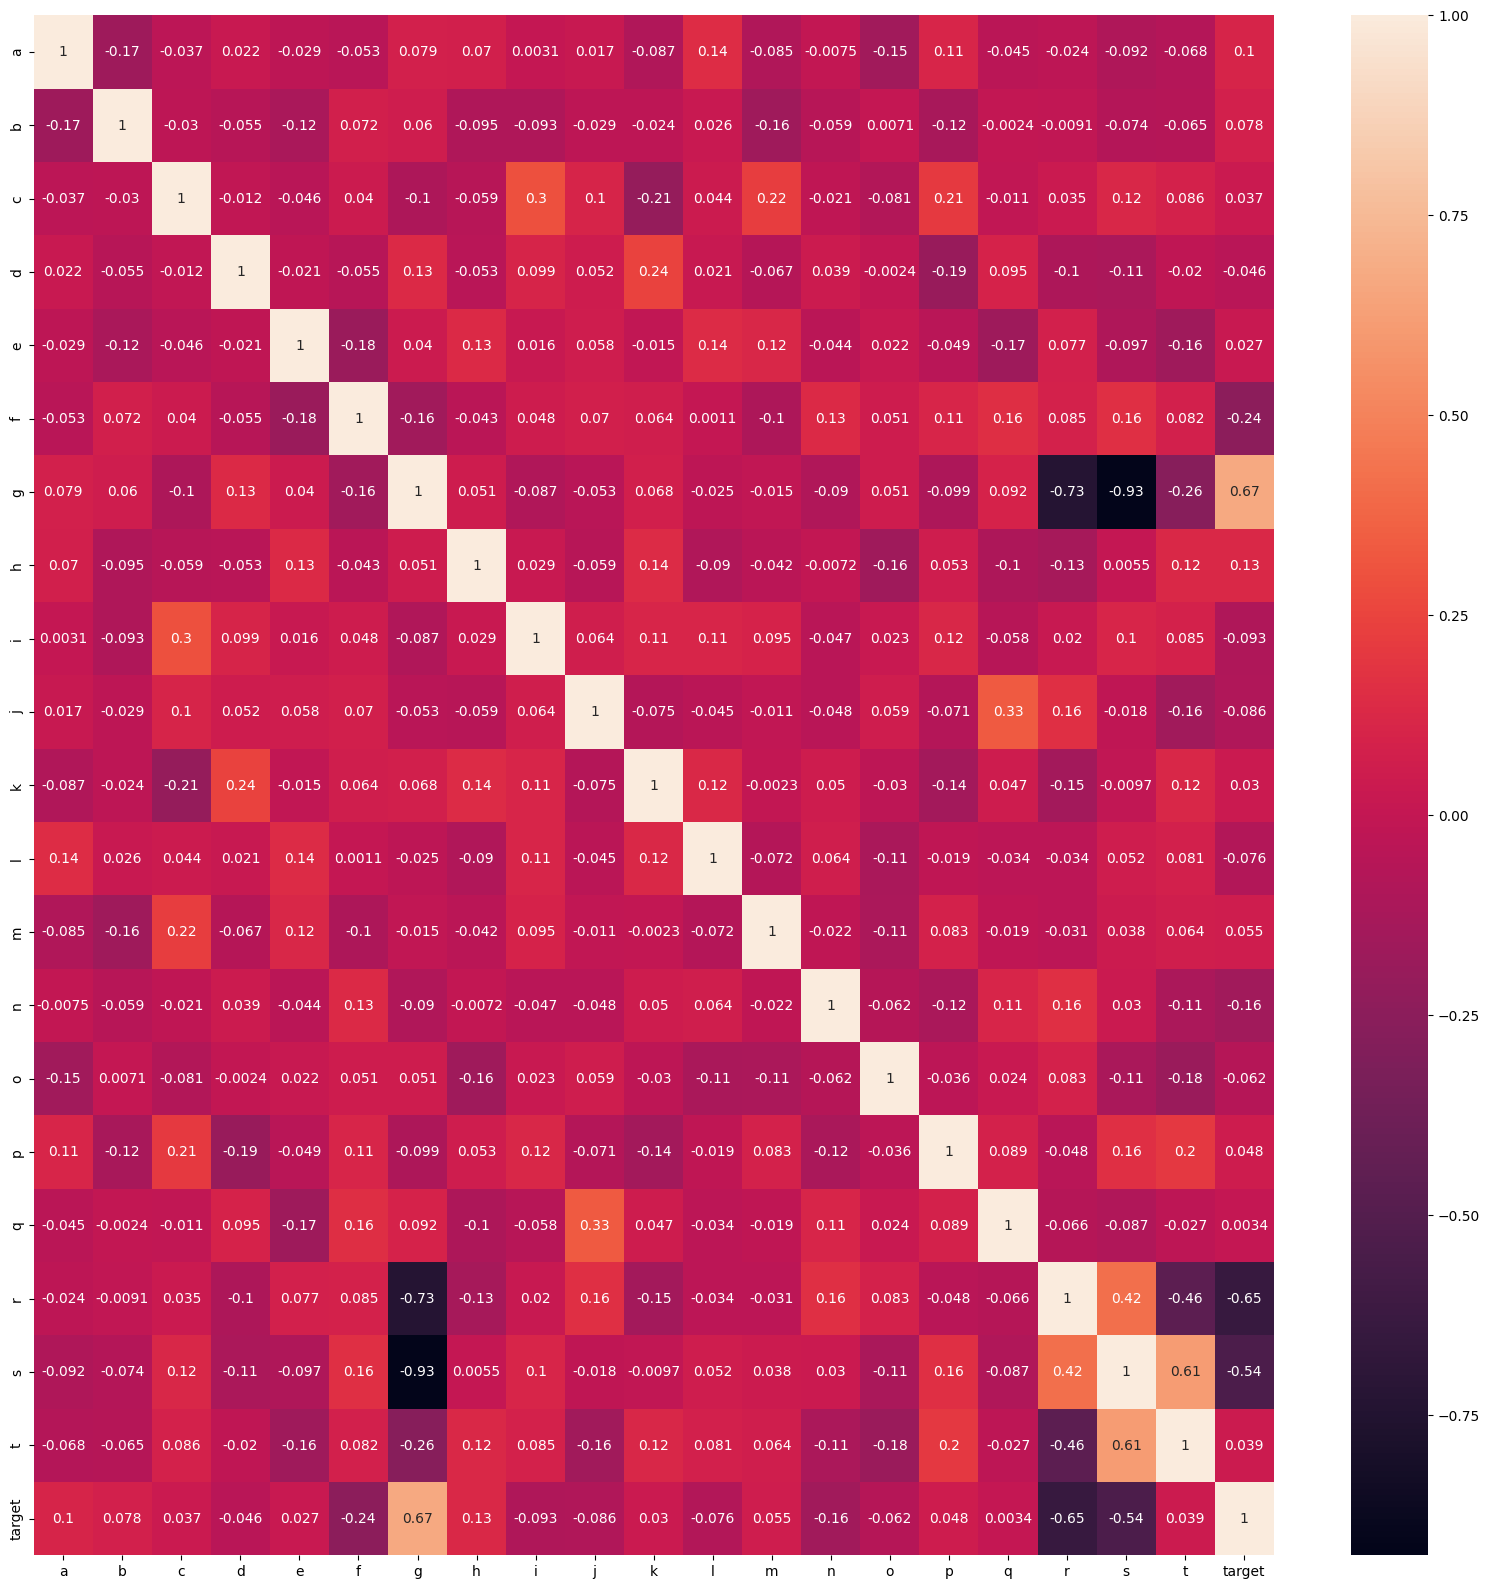

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
features = ['a', 'f', 'g', 'h', 'r', 's']

In [ ]:
x_data_generated_new1 = df[features]

**b) Отсеките низковариативные признаки (VarianceThreshold).**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
thresholder = VarianceThreshold()

In [ ]:
x_data_generated_new2 = thresholder.fit_transform(x_data_generated)

In [ ]:
x_data_generated_new2[0]

array([-1.09820358e+00,  4.95406666e-01, -3.85009161e-04, -1.20609359e+00,
        6.50538005e-02,  7.93165813e-01, -1.67323798e+00,  5.50056672e-01,
        1.14326469e-01, -8.30599772e-01,  1.67006720e+00,  1.15201263e+00,
        6.80932660e-01, -7.46179139e-02,  3.90336932e-01,  1.99125754e+00,
        2.53956843e-01,  2.39612071e-01,  1.06222420e+00,  1.72454361e+00])

**c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.**

In [ ]:
res2 = cross_val_score(LogisticRegression(), x_data_generated_new1, y_data_generated, scoring='accuracy').mean()
res2

0.8299999999999998

In [ ]:
results.loc[len(results.index)] = ['Corr_matrix', x_data_generated_new1.shape[1], res2]

In [ ]:
res3 = cross_val_score(LogisticRegression(), x_data_generated_new2, y_data_generated, scoring='accuracy').mean()
res3

0.76

In [ ]:
results.loc[len(results.index)] = ['VarianceThreshold', len(x_data_generated_new2[0]), res3]

# **4. Осуществите отбор признаков на основе дисперсионного анализа:**

**a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
x_data_generated_new3 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

In [ ]:
x_data_generated_new3[0]

array([ 0.79316581, -1.67323798, -0.07461791,  0.23961207,  1.0622242 ])

**b) Повторите п. 2 на отобранных признаках.**

In [ ]:
res4 = cross_val_score(LogisticRegression(), x_data_generated_new3, y_data_generated, scoring='accuracy').mean()
res4

0.8399999999999999

In [ ]:
results.loc[len(results.index)] = ['F_classif', len(x_data_generated_new3[0]), res4]

#**5. Отбор с использованием моделей:**

**a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=42).fit(x_data_generated, y_data_generated)

In [ ]:
model1 = SelectFromModel(logistic, prefit=True)

In [ ]:
x_data_generated_new4 = model1.transform(x_data_generated)

In [ ]:
x_data_generated_new4[0]

array([-1.09820358e+00,  4.95406666e-01, -3.85009161e-04, -1.20609359e+00,
        7.93165813e-01, -1.67323798e+00,  5.50056672e-01,  1.14326469e-01,
        1.67006720e+00,  1.15201263e+00, -7.46179139e-02,  3.90336932e-01,
        1.99125754e+00,  2.53956843e-01,  2.39612071e-01])

**b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier(random_state=42)

In [ ]:
X_work = df.drop(['target'], axis=1)
y_work = df['target']

In [ ]:
model2.fit(X_work, y_work)

RandomForestClassifier(random_state=42)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'a'),
  Text(1, 0, 'b'),
  Text(2, 0, 'c'),
  Text(3, 0, 'd'),
  Text(4, 0, 'e'),
  Text(5, 0, 'f'),
  Text(6, 0, 'g'),
  Text(7, 0, 'h'),
  Text(8, 0, 'i'),
  Text(9, 0, 'j'),
  Text(10, 0, 'k'),
  Text(11, 0, 'l'),
  Text(12, 0, 'm'),
  Text(13, 0, 'n'),
  Text(14, 0, 'o'),
  Text(15, 0, 'p'),
  Text(16, 0, 'q'),
  Text(17, 0, 'r'),
  Text(18, 0, 's'),
  Text(19, 0, 't')])

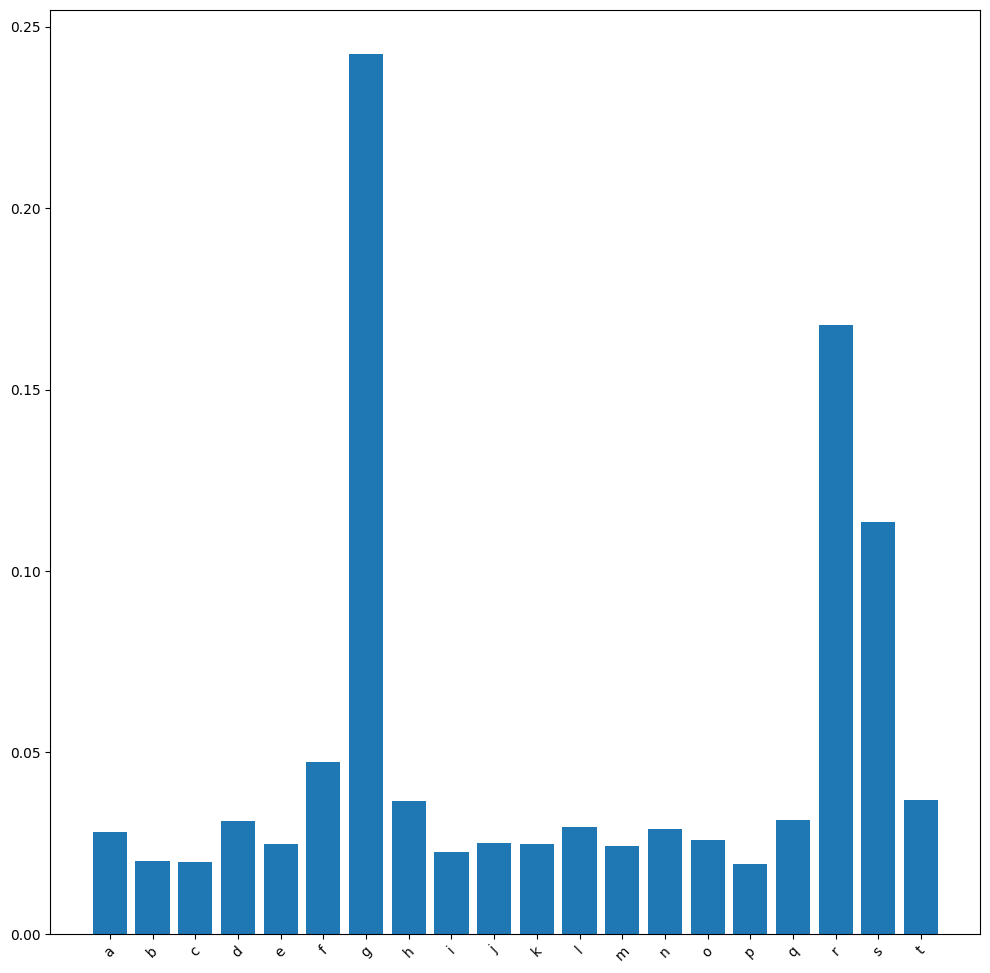

In [ ]:
plt.figure(figsize=(12,12))
plt.bar(X_work.columns, model2.feature_importances_)
plt.xticks(rotation=45)

In [ ]:
x_data_generated_new5 = df[['f', 'g', 'r', 's', 't']]

**c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.**

In [ ]:
res5 = cross_val_score(LogisticRegression(), x_data_generated_new4, y_data_generated, scoring='accuracy').mean()
res5

0.79

In [ ]:
results.loc[len(results.index)] = ['LogisticRegression', len(x_data_generated_new4[0]), res5]

In [ ]:
res6 = cross_val_score(LogisticRegression(), x_data_generated_new5, y_data_generated, scoring='accuracy').mean()
res6

0.8500000000000002

In [ ]:
results.loc[len(results.index)] = ['RandomForestClassifier', x_data_generated_new5.shape[1], res6]

#**6. Перебор признаков:**

**a) SequentialFeatureSelector.**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
model3 = SequentialFeatureSelector(knn, n_features_to_select=5)
model3.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5)

In [ ]:
model3.get_support()

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False])

In [ ]:
x_data_generated_new6 = model3.transform(x_data_generated)

In [ ]:
x_data_generated_new6[0]

array([-3.85009161e-04, -1.67323798e+00,  2.53956843e-01,  2.39612071e-01,
        1.06222420e+00])

**b) Повторите п. 2 на отобранных признаках.**

In [ ]:
res7 = cross_val_score(LogisticRegression(), x_data_generated_new6, y_data_generated, scoring='accuracy').mean()
res7

0.8

In [ ]:
results.loc[len(results.index)] = ['SequentialFeatureSelector', len(x_data_generated_new6[0]), res7]

#**7. Сформулируйте выводы по проделанной работе:**

**a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.**

In [ ]:
results.sort_values(by=['Cредняя точность модели'], ascending = False)

,Cпособ выбора признаков,Количество признаков,Cредняя точность модели
5,RandomForestClassifier,5,0.85
3,F_classif,5,0.84
1,Corr_matrix,6,0.83
6,SequentialFeatureSelector,5,0.80
4,LogisticRegression,15,0.79
0,First,20,0.76
2,VarianceThreshold,20,0.76


Выводы: Наибольшую точность показала модель "Случайнного леса", при этом VarianceThreshold не дала вообще никаких результатов